Import packages, read csv and create dataframe.

In [1]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import requests
import config
import json
from bs4 import BeautifulSoup as bs
import re
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_ (1).csv', encoding="ISO-8859-1")

Check for null values. 

In [3]:
df.isnull().sum()

ÈÀOrder                                                          0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  51
NYC Borough, Block and Lot (BBL) self-reported                    0
NYC Building Identification Number (BIN)                          0
Address 1 (self-reported)                                         0
Address 2                                                         0
Postal Code                                                       0
Street Number                                                  2186
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [4]:
len(df)

11746

In [6]:
df.columns

Index(['ÈÀOrder', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ftå_)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ftå_)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ftå_)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ftå_)', 'Weather Normalized Site EUI (kBtu/ftå_)',
     

Drop unncessary or redundant features.

In [7]:
df.head()

,ÈÀOrder,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ftå_),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,"13,286",201/205,13286,201/205,"1,013,160,001",1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,5/1/17 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,"28,400",NYP Columbia (West Campus),28400,NYP Columbia (West Campus),"1,021,380,040",1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,4/27/17 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,"4,778,226",MSCHoNY North,28400,NYP Columbia (West Campus),"1,021,380,030",1-02138-0030,1063380,3975 Broadway,Not Available,...,NaN,4/27/17 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,"4,778,267",Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),"1,021,390,001",1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,NaN,4/27/17 11:23,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,"4,778,288",Neuro Institute,28400,NYP Columbia (West Campus),"1,021,390,085",1-02139-0085,1063403,710 West 168th Street,Not Available,...,NaN,4/27/17 11:23,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [8]:
to_drop = ['ÈÀOrder', 'NYC Borough, Block and Lot (BBL) self-reported', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ftå_)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ftå_)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ftå_)', 'Metered Areas  (Water)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ftå_)', 'Release Date', 'Water Required?', 'DOF Benchmarking Submission Status']
df.drop(to_drop, inplace=True, axis=1)


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.columns

Index(['Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ftå_)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'ENERGY STAR Score', 'Site EUI (kBtu/ftå_)',
       'Weather Normalized Site EUI (kBtu/ftå_)',
       'Weather Normalized Site Electricity Intensity (kWh/ftå_)',
       'Weather Normalized Site Natural Gas Intensity (therms/ftå_)',
       'Weather Normalized Source EUI (kBtu/ftå_)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'We

In [12]:
df.isna().sum()

Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  51
NYC Building Identification Number (BIN)                          0
Address 1 (self-reported)                                         0
Address 2                                                         0
Postal Code                                                       0
Street Number                                                  2186
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                                            118
Primary Property Type - Self Selected                             0
List of All Property Use Types at Property      

Get rid of commas in columns that will be turned into numeric datatypes. 

In [13]:
df['DOF Gross Floor Area'] =  df['DOF Gross Floor Area'].str.replace(",", "")
df['Year Built'] =  df['Year Built'].str.replace(",", "")
df['Largest Property Use Type - Gross Floor Area (ftå_)'] = df['Largest Property Use Type - Gross Floor Area (ftå_)'].str.replace(",", "")
df['Site EUI (kBtu/ftå_)'] =  df['Site EUI (kBtu/ftå_)'].str.replace(",", "")
df['Weather Normalized Site EUI (kBtu/ftå_)'] = df['Weather Normalized Site EUI (kBtu/ftå_)'].str.replace(",", "")
df['Source EUI (kBtu/ftå_)'] = df['Source EUI (kBtu/ftå_)'].str.replace(",", "")


In [14]:
df['Source EUI (kBtu/ftå_)'].isna().sum()

163

In [15]:
len(df)

11746

Drop null values in dependent variable column.

In [16]:
df = df.dropna(subset=['Source EUI (kBtu/ftå_)']) 

In [17]:
len(df)

11583

Convert dependent variable datatypes to float. 

In [18]:
df['Source EUI (kBtu/ftå_)'] = df['Source EUI (kBtu/ftå_)'].astype(float)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
len(df) #continue checking length of df just to make sure  

11583

In [21]:
df['Source EUI (kBtu/ftå_)'].isnull().sum()

0

Check distribution using historgram and boxplot then decide whether or not to drop outliers. 

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


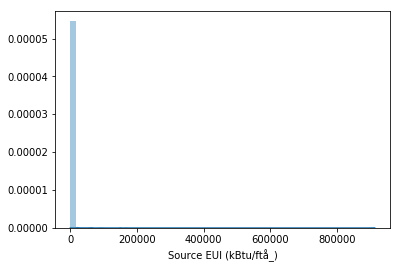

In [23]:
sns.distplot(df['Source EUI (kBtu/ftå_)'])

In [24]:
df.sort_values('Source EUI (kBtu/ftå_)',ascending=False)

,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ftå_),Weather Normalized Site EUI (kBtu/ftå_),Weather Normalized Site Electricity Intensity (kWh/ftå_),Weather Normalized Site Natural Gas Intensity (therms/ftå_),Weather Normalized Source EUI (kBtu/ftå_),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ftå_),Source EUI (kBtu/ftå_),Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8080,"4,414,323",234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,"3,028,937,502","3390250 , 3338313",234 Skillman avenue,Not Available,11211,234,SKILLMAN AVENUE,Brooklyn,61811,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900,2004,1,90,Whole Building,1,869265,939329,9.9,9393,986366,5.34E+08,"1,983,655.60",563239.6,"2,627,199.10","2,627,015",184.1,"56,900",912801.1,40.716233,-73.941410,1.0,34.0,477.0,East Williamsburg ...
8187,"4,022,803",7-29 HEGEMAN LLC,Not Applicable: Standalone Property,Not Applicable: Standalone Property,"3,036,210,001",3082700,7-29 hegeman avenue,Not Available,11212,7,HEGEMAN AVENUE,Brooklyn,158620,Multifamily Housing,Multifamily Housing,Multifamily Housing,158,1948,1,100,Whole Building,Not Available,112173.60,111918.4,6259.4,905.6,162150.3,143087,"3,414,729.70",988979.9,"1,076.90",760,316.9,158,162951.8,40.655591,-73.911863,16.0,42.0,896.0,Brownsville ...
3908,"2,946,993",St. Mary's Home for Working Girls,Not Applicable: Standalone Property,Not Applicable: Standalone Property,"1,014,270,011",1043968,225 East 72nd Street,Not Available,10021,225,EAST 72 STREET,Manhattan,95267,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,67655,1960,1,100,Whole Building,1,126307.40,126307.4,7.3,0,152001.3,373,"1,690,987.20",495599.9,"567,440.80",2,"567,438.80","67,655",152001.3,40.769454,-73.959876,8.0,4.0,126.0,Lenox Hill-Roosevelt Island ...
7,"2,610,789",North Shore Towers,2610789,North Shore Towers,"4,084,890,001",4456886;4456885;4453535;4456888,270-10 Grand Central Parkway,269-271-10 Grand Central Parkway,11005,269,GRAND CENTRAL PKWY,Queens,3750565,Multifamily Housing,"Financial Office, Medical Office, Multifamily ...",Multifamily Housing,2400000,1974,4,100,Whole Building,Not Available,143974.40,143976,Not Available,1439.7,151174.5,3.94E+09,NaN,Not Available,"20,943,400","20,943,400",0,"2,738,875",151172.9,40.757859,-73.715543,13.0,23.0,155101.0,Glen Oaks-Floral Park-New Hyde Park ...
8279,"4,022,808",C GROSS,Not Applicable: Standalone Property,Not Applicable: Standalone Property,"3,047,180,036",3103619,505 ROCKAWAY PARKWAY,Not Available,11212,505,ROCKAWAY PARKWAY,Brooklyn,54000,Multifamily Housing,Multifamily Housing,Multifamily Housing,54,1931,1,100,Whole Building,Not Available,103562.70,103415.3,3590.4,911.6,134189.5,49229,"669,485.60",193881.7,323.6,261.5,62.1,54,134652.4,40.655930,-73.914328,17.0,42.0,890.0,Rugby-Remsen Village ...
8280,"4,022,813",GROSS C,Not Applicable: Standalone Property,Not Applicable: Standalone Property,"3,047,570,001",3105176,660 EAST 98TH STREET,Not Available,11236,638,EAST 98 STREET,Brooklyn,121472,Multifamily Housing,Multifamily Housing,Multifamily Housing,121,1966,1,100,Whole Building,Not Available,84969.60,88805.9,6202,676.4,137473,81850.1,"2,588,418.40",750439.8,648.8,408.6,240.2,121,133927.1,40.653839,-73.910503,17.0,42.0,928.0,Rugby-Remsen

Buildings are mostly multifamily housing / apartment buildings

In [26]:
df['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing                                 8606
Office                                              1284
Hotel                                                222
Other                                                182
Non-Refrigerated Warehouse                           180
Residence Hall/Dormitory                             103
College/University                                   102
Senior Care Community                                 97
Self-Storage Facility                                 95
Retail Store                                          89
K-12 School                                           84
Distribution Center                                   70
Mixed Use Property                                    69
Manufacturing/Industrial Plant                        56
Hospital (General Medical & Surgical)                 42
Parking                                               41
Medical Office                                        31
Supermarket/Grocery Store      

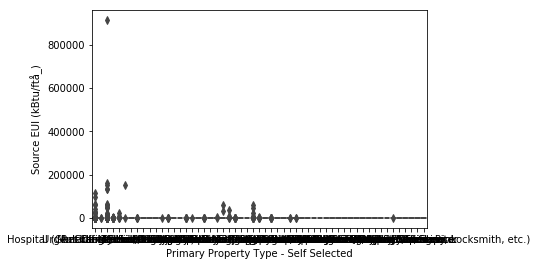

In [27]:
ax = sns.boxplot(x='Primary Property Type - Self Selected', y='Source EUI (kBtu/ftå_)', data=df)

In [28]:
df.describe()

,Number of Buildings - Self-reported,Occupancy,Source EUI (kBtu/ftå_),Latitude,Longitude,Community Board,Council District,Census Tract
count,11583.000000,11583.000000,11583.000000,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000
mean,1.280066,98.780109,385.908029,40.754213,-73.957236,7.134351,15.765767,4916.112902
std,3.964894,7.417962,9312.736225,0.080006,0.046097,3.953760,15.676611,13236.678721
min,0.000000,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,1.000000,100.000000,99.400000,40.707054,-73.984756,4.000000,4.000000,99.000000
50%,1.000000,100.000000,124.900000,40.758841,-73.963051,7.000000,9.000000,200.000000
75%,1.000000,100.000000,162.750000,40.817588,-73.932849,9.000000,33.000000,530.000000
max,161.000000,100.000000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


Distribution is not normal with outliers. Define outliers using 5 and 95 percentile and check distribution.

In [29]:
upper_lim = df['Source EUI (kBtu/ftå_)'].quantile(.95)

In [30]:
upper_lim

285.28

In [31]:
lower_lim = df['Source EUI (kBtu/ftå_)'].quantile(.05)

In [32]:
lower_lim

47.510000000000005

In [33]:
len(df)

11583

In [34]:
df_without_outliers = df[(df['Source EUI (kBtu/ftå_)'] < upper_lim) & (df['Source EUI (kBtu/ftå_)'] > lower_lim)]

In [35]:
len(df_without_outliers)

10423

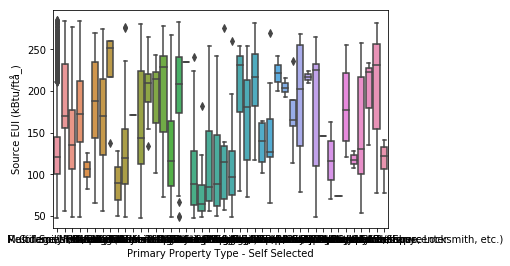

In [36]:
ax = sns.boxplot(x='Primary Property Type - Self Selected', y='Source EUI (kBtu/ftå_)', data=df_without_outliers)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


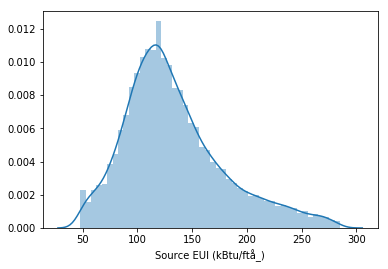

In [37]:
sns.distplot(df_without_outliers['Source EUI (kBtu/ftå_)'])

Without outliers, distribution of dependent variable looks normal. However, accuracy will likely be improved by including outliers. 

Select features to be used in modeling. 

In [56]:
df_model = df[['Property Id', 'Property Name', 'Postal Code', 'Source EUI (kBtu/ftå_)', 'Number of Buildings - Self-reported', 'Borough', 'Primary Property Type - Self Selected', 'Largest Property Use Type - Gross Floor Area (ftå_)', 'Year Built', 'Metered Areas (Energy)', 'ENERGY STAR Score']]




In [57]:
df_model

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447,1963,Whole Building,Not Available
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181,1969,Whole Building,55
5,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874,1932,Whole Building,55
7,"2,610,789",North Shore Towers,11005,151172.9,4,Queens,Multifamily Housing,2400000,1974,Whole Building,Not Available
8,"2,611,745",Towers Golf Course and Irrigation Wells,11005,3574.2,1,Queens,Other,200,1974,Whole Building,Not Available
9,"3,618,219",430 W 119 ET AL,10027,9.3,3,NaN,Other,166302,1910,Whole Building,Not Available
13,"2,637,863",Cadman Towers,11201,87.9,2,NaN,Multifamily Housing,412503,1903,Whole Building,93
14,"5,871,253",Cadman - 10 Clinton St,11201,352.2,1,Brooklyn,Multifamily Housing,162656,1903,Whole Building,1
15,"2,777,235",STATEN ISLAND UNIVERSITY HOSPITAL Seaview,10305,599.5,2,NaN,Hospital (General Medical & Surgical),567517,1950,Whole Building,80
18,"2,777,309",Barnard College,10029,188.7,7,NaN,College/University,323000,1907,Whole Building,Not Available


Check for null values in new dataframe.

In [58]:
df_model.isnull().sum()

Property Id                                              0
Property Name                                            0
Postal Code                                              0
Source EUI (kBtu/ftå_)                                   0
Number of Buildings - Self-reported                      0
Borough                                                100
Primary Property Type - Self Selected                    0
Largest Property Use Type - Gross Floor Area (ftå_)      0
Year Built                                               0
Metered Areas (Energy)                                   0
ENERGY STAR Score                                        0
dtype: int64

Drop rows without borough value. 

In [59]:
df_model = df_model.dropna(subset=['Borough']) 

In [60]:
len(df_model)

11483

In [61]:
df_model.isnull().sum()

Property Id                                            0
Property Name                                          0
Postal Code                                            0
Source EUI (kBtu/ftå_)                                 0
Number of Buildings - Self-reported                    0
Borough                                                0
Primary Property Type - Self Selected                  0
Largest Property Use Type - Gross Floor Area (ftå_)    0
Year Built                                             0
Metered Areas (Energy)                                 0
ENERGY STAR Score                                      0
dtype: int64

Attempted to call NREL API for utility rate data but ultimately decided against it because there was no change across the city

In [62]:
# def get_utility_rates(lat, lon, sector):
#     url = f'https://api.openei.org/utility_rates?version=3&format=json&api_key=15mrCUXrdWe1RZmapHZKD0a3v8w9ZKi8hey3ILYV&lat={lat}&lon={lon}&sector={sector}'
#     response = requests.get(url)
#     print(response)
#     info = response.json()
#     return info 
    
    

In [63]:
# def nrel_rates(lat, lon):
#     url = f'https://developer.nrel.gov/api/utility_rates/v3.json?api_key=xwRRf4x2XYa3ZGjEq2YCfQfWOaclVLZsrd35j07p&lat={lat}&lon={lon}'
#     response = requests.get(url)
#     print(response)
#     info = response.json()
#     return info 

In [64]:
# def tuplify(df):
#     tup_list = []
    
#     for index, row in df.iterrows():
#         tup = (row['Property Id'], 
#                row['Latitude'], 
#                row['Longitude'] 
#                 ) # tuple length 7
#         tup_list.append(tup)
#     return tup_list

In [65]:
# df_smol = df_model.dropna(subset=['Latitude']) 

In [66]:
# coors = tuplify(df_smol)

Hard coded new york zip code and median income associated with each zip code. 

In [67]:
zips = [10007,
10280,
10162,
10004,
10069,
10282,
10006,
10022,
10005,
10024,
10028,
10021,
10023,
10128,
10017,
10014,
10016,
10010,
10011,
10003,
10012,
10019,
10044,
10025,
10018,
10036,
10001,
10009,
10013,
10033,
10038,
10034,
10040,
10037,
10032,
10031,
10002,
10027,
10026,
10029,
10030,
10039,
10035]

In [68]:
income = [112947.00,    
108536.00,
108416.00,
101868.00,
88091.00,
86066.00,
81334.00,
80406.00,
79517.00,
78066.00,
77565.00,
75472.00,
72424.00,
70031.00,
69273.00,
66601.00,
66342.00,
62467.00,
61986.00,
60891.00,
58313.00,
55869.00,
49976.00,
49733.00,
48705.00,
41002.00,
40932.00,
40176.00,
38304.00,
31348.00,
31316.00,
29479.00,
27905.00,
26561.00,
26237.00,
24285.00,
24022.00,
23150.00,
22491.00,
22232.00,
17970.00,
17370.00,
14896.00]

In [69]:
manhattan_zip_income = dict(tuple(zip(zips, income)))

Only keep rows if postal code column is numeric data. Writing code to convert incorrectly entered postal code information or those including a dash is not worth saving just 8 samples. 

In [70]:
df_model = df_model[df_model['Postal Code'].apply(lambda x: x.isnumeric())]

In [71]:
df_model['Postal Code'] = df_model['Postal Code'].astype(int)

In [72]:
len(df_model)

11475

Write function to find corresponding median income for each zip code entered.

In [73]:
def zip_income(code):
    result = 0
    for key, value in manhattan_zip_income.items(): 
        if key == code:
            result = value
        else: 
            pass
    return result

Get zipcode income data for the Bronx by scraping zipatlas.com.

In [74]:
url_bronx = 'http://zipatlas.com/us/ny/bronx/zip-code-comparison/median-household-income.htm'

In [75]:
response = requests.get(url_bronx)
soup = bs(response.content, "html.parser")
report = soup.find_all('td', attrs={'class':'report_data', 'align':'center'})

bronx_zip = []
for i in range(len(report)):
    zip_ = report[i].text
    zip_ = int(zip_)
    bronx_zip.append(zip_)
    
bronx_income = soup.find_all('b')

bronx_money = []
for i in range(len(bronx_income)):
    income = bronx_income[i].text
    bronx_money.append(income)

bronx_money = bronx_money[:25]

money_clean = []
for i in bronx_money:
    new = i.replace('$', '')
    new = new.replace(',', '')
    new = float(new)
    money_clean.append(new)
    
bronx_zip_income = dict(tuple(zip(bronx_zip, money_clean)))

In [76]:
manhattan_zip_income.update(bronx_zip_income)

Get income data for brooklyn.

In [77]:
url_brooklyn = 'http://zipatlas.com/us/ny/brooklyn/zip-code-comparison/median-household-income.htm'
response = requests.get(url_brooklyn)
soup = bs(response.content, "html.parser")
report = soup.find_all('td', attrs={'class':'report_data', 'align':'center'})
brooklyn_zip = []
for i in range(len(report)):
    zip_ = report[i].text
    zip_ = int(zip_)
    brooklyn_zip.append(zip_)
    
brooklyn_income = soup.find_all('b')

brooklyn_money = []
for i in range(len(brooklyn_income)):
    income = brooklyn_income[i].text
    brooklyn_money.append(income)
    
money_clean = []
for i in brooklyn_money:
    new = i.replace('$', '')
    new = new.replace(',', '')
    new = float(new)
    money_clean.append(new)
    
brooklyn_zip_income = dict(tuple(zip(brooklyn_zip, money_clean)))

In [78]:
manhattan_zip_income.update(brooklyn_zip_income)

Get median income data for astoria, staten island, and queens zip codes. 

In [79]:
url_astoria = 'http://zipatlas.com/us/ny/astoria/zip-code-comparison/median-household-income.htm'
response = requests.get(url_astoria)
soup = bs(response.content, "html.parser")
report = soup.find_all('td', attrs={'class':'report_data', 'align':'center'})

astoria_zip = []
for i in range(len(report)):
    zip_ = report[i].text
    zip_ = int(zip_)
    astoria_zip.append(zip_)

astoria_income = soup.find_all('b')

astoria_money = []
for i in range(len(astoria_income)):
    income = astoria_income[i].text
    astoria_money.append(income)
    
money_clean = []
for i in astoria_money:
    new = i.replace('$', '')
    new = new.replace(',', '')
    new = float(new)
    money_clean.append(new)

astoria_zip_income = dict(tuple(zip(astoria_zip, money_clean)))

manhattan_zip_income.update(astoria_zip_income)


In [80]:
url_staten = 'http://zipatlas.com/us/ny/staten-island/zip-code-comparison/median-household-income.htm'
response = requests.get(url_staten)
soup = bs(response.content, "html.parser")
report = soup.find_all('td', attrs={'class':'report_data', 'align':'center'})

staten_zip = []
for i in range(len(report)):
    zip_ = report[i].text
    zip_ = int(zip_)
    staten_zip.append(zip_)

staten_income = soup.find_all('b')

staten_money = []
for i in range(len(staten_income)):
    income = staten_income[i].text
    staten_money.append(income)
    
money_clean = []
for i in staten_money:
    new = i.replace('$', '')
    new = new.replace(',', '')
    new = float(new)
    money_clean.append(new)

staten_zip_income = dict(tuple(zip(staten_zip, money_clean)))

manhattan_zip_income.update(staten_zip_income)


In [81]:
url_queens = 'http://zipatlas.com/us/ny/queens-village/zip-code-comparison/median-household-income.htm'
response = requests.get(url_queens)
soup = bs(response.content, "html.parser")
report = soup.find_all('td', attrs={'class':'report_data', 'align':'center'})

queens_zip = []
for i in range(len(report)):
    zip_ = report[i].text
    zip_ = int(zip_)
    queens_zip.append(zip_)

queens_income = soup.find_all('b')

queens_money = []
for i in range(len(queens_income)):
    income = queens_income[i].text
    queens_money.append(income)
    
money_clean = []
for i in queens_money:
    new = i.replace('$', '')
    new = new.replace(',', '')
    new = float(new)
    money_clean.append(new)

queens_zip_income = dict(tuple(zip(queens_zip, money_clean)))

manhattan_zip_income.update(queens_zip_income)

In [82]:
len(manhattan_zip_income)

124

Hard code additional zip codes. 

In [83]:
missing = {11375: 71643,         
10065: 110163,        
11372: 46402,    
11101: 95879,       
11373: 49042,       
11355: 38370,       
11374: 56863,       
11354: 46650,       
10075: 104583,      
11432: 52975,       
11377: 54989,        
11104: 56578,        
11435: 59535,        
11415: 65981,        
11368: 47862,        
11691: 42434,        
11365: 63455,        
11367: 58924,        
11378: 68460,       
11418: 67003,        
11364: 71030,        
11357: 81053,        
11385: 64481,        
11362: 80828,
11249: 31519,
11360: 84476,
11370: 59901  
          }  


In [84]:
manhattan_zip_income.update(missing)

In [85]:
len(manhattan_zip_income)

151

In [86]:
df_model['Median Income for Zip'] = df_model.apply(lambda x: zip_income(x['Postal Code']), axis=1)

In [87]:
missing_df = df_model[df_model['Median Income for Zip'] == 0.0]

In [88]:
len(missing_df)

338

In [89]:
df_model['Postal Code'].nunique()

276

In [90]:
df_model.head()

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447,1963,Whole Building,Not Available,69273.0
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181,1969,Whole Building,55,26237.0
5,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874,1932,Whole Building,55,75472.0
7,"2,610,789",North Shore Towers,11005,151172.9,4,Queens,Multifamily Housing,2400000,1974,Whole Building,Not Available,0.0
8,"2,611,745",Towers Golf Course and Irrigation Wells,11005,3574.2,1,Queens,Other,200,1974,Whole Building,Not Available,0.0


In [91]:
df_model.isnull().sum()

Property Id                                            0
Property Name                                          0
Postal Code                                            0
Source EUI (kBtu/ftå_)                                 0
Number of Buildings - Self-reported                    0
Borough                                                0
Primary Property Type - Self Selected                  0
Largest Property Use Type - Gross Floor Area (ftå_)    0
Year Built                                             0
Metered Areas (Energy)                                 0
ENERGY STAR Score                                      0
Median Income for Zip                                  0
dtype: int64

No null values in final set, but finding median income data for every zip code was too time consuming and has resulted in 338 samples with a 0.0 value for that feature. Therefore, I decided to drop those samples. 

In [92]:
df_model = df_model.drop(df_model[(df_model['Median Income for Zip'] == 0.0)].index)

In [93]:
len(df_model)

11137

In [94]:
df_model['Year Built'] = df_model['Year Built'].astype(int)
df_model['Largest Property Use Type - Gross Floor Area (ftå_)'] = df_model['Largest Property Use Type - Gross Floor Area (ftå_)'].astype(float)

## Feature engineering to estimate building load profiles 

Create mini dataframe to test function.

In [95]:
df_mini = df_model[:250]

More feature engineering. I combined equipment and lighting breakdowns into one metric and added pumps into equipment metric. Assume that all multifamily housing has relatively same load breakdown. This function gathers building type information, square footage, and year built in order to provide a total load percentage breakdown for electricity and natural gas. 

In [96]:
def category(row):
    row['building_type'] = None
    row['gas_heat'] = 0
    row['gas_water'] = 0
    row['gas_equip'] = 0
    row['elec_heat'] = 0
    row['elec_lighting'] = 0
    row['elec_equipment'] = 0
    row['elec_fans'] = 0
    row['elec_ref'] = 0 
    row['elec_cool'] = 0
    row['elec_percent_total'] = 0
    building_type = None
    gas_heat = 0
    gas_water = 0
    gas_equip = 0
    elec_heat = 0
    elec_lighting = 0
    elec_equipment = 0
    elec_fans = 0
    elec_ref = 0 
    elec_cool = 0
    elec_percent_total = 0
    if (row['Primary Property Type - Self Selected'] == 'Multifamily Housing' or row['Primary Property Type - Self Selected'] == 'Residence Hall/Dormitory' or row['Primary Property Type - Self Selected'] == 'Senior Care Community' or row['Primary Property Type - Self Selected'] == 'Residential Care Facility' or row['Primary Property Type - Self Selected'] == 'Other - Lodging/Residential') and row['Year Built'] >= 1980:
        building_type = 'residential'
        gas_heat = 1184.65 / 1469.31 
        gas_water = 284.66 / 1469.31
        gas_equip = 0 
        elec_heat = 2.42 / 985.79
        elec_lighting = (101.09 + 448.20) / 985.79
        elec_equipment = 448.20 / 985.79
        elec_fans = 69.45 / 985.79
        elec_ref = 0 
        elec_cool = 135.53 / 985.79
        elec_percent_total = 985.79 / (1469.31 +985.79)

    elif row['Primary Property Type - Self Selected'] == 'K-12 School' and row['Year Built'] >= 1980:
        building_type = 'primary school'
        gas_heat = 1449.30 / 1857.81 
        gas_water = 174.17 / 1857.81
        gas_equip = 234.34 / 1857.81
        elec_heat =  0
        elec_cool = 418.34 / 3879.32
        elec_lighting = (165.23 + 1850.87) / 3879.32
        elec_equipment = (1230.23 + 1.50) / 3879.32
        elec_fans = 143.81 / 3879.32
        elec_ref = 69.35 / 3879.32
        elec_percent_total = 3879.32 / (3879.32 + 1857.81)
        
    elif (row['Primary Property Type - Self Selected'] == 'College/University' or row['Primary Property Type - Self Selected'] == 'Other - Education') and row['Year Built'] >= 1980:
        building_type = 'secondary education'
        gas_heat = 6906.37 / 7696.50 
        gas_water = 436.74 / 7696.50
        gas_equip = 353.39 / 7696.50
        elec_heat =  0 
        elec_cool = 5305.92 / 13272.97
        elec_lighting = (343.58 + 4096.48) / 13272.97
        elec_equipment = (2277.82 + 26.43) / 13272.97
        elec_fans = 1083.49 / 13272.97
        elec_ref = 139.25 / 13272.97
        elec_percent_total = 13272.97 / (13272.97 + 7696.50)
        
    elif row['Primary Property Type - Self Selected'] == 'Hotel' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] <= 50000 and row['Year Built'] >= 1980:
        building_type = 'small hotel'
        gas_heat = 362.60 / 944.50 
        gas_water = 392.43 / 944.50
        gas_equip = 189.48 / 944.50
        elec_heat =  58.19 / 2778.25 
        elec_cool = 438.78 / 2778.25
        elec_lighting = (980.34 + 262.69) / 2778.25
        elec_equipment = (812.22 + 1.71) / 2778.25
        elec_fans = 224.32 / 2778.25
        elec_ref = 0 / 2778.25
        elec_percent_total = 2778.25 / (2778.25 + 944.50)
        
    elif (row['Primary Property Type - Self Selected'] == 'Office' or row['Primary Property Type - Self Selected'] == 'Medical Office' or row['Primary Property Type - Self Selected'] == 'Financial Office') and row['Largest Property Use Type - Gross Floor Area (ftå_)'] <= 60000 and row['Year Built'] >= 1980:
        building_type = 'small office building'
        gas_heat = 121.63 / 155.91 
        gas_water = 34.28 / 155.91
        gas_equip = 0 / 155.91
        elec_heat =  561.87 / 3388.81 
        elec_cool = 454.20 / 3388.81
        elec_lighting = (279.73 + 951.62) / 3388.81
        elec_equipment = (1066.52) / 3388.81
        elec_fans = 74.60 / 3388.81
        elec_ref = 0 / 3388.81
        elec_percent_total = 3388.81 / (3388.81 + 155.91)
        
    elif row['Primary Property Type - Self Selected'] == 'Retail Store' and row['Year Built'] >= 1980:
        building_type = 'retail'
        gas_heat = 1115.55 / 1115.55 
        gas_water = 0 / 1115.55
        gas_equip = 0 / 1115.55
        elec_heat =  4.30 / 1838.47 
        elec_cool = 161.65 / 1838.47
        elec_lighting = (971.08 + 157.00) / 1838.47
        elec_equipment = (198.81) / 1838.47
        elec_fans = 345.62 / 1838.47
        elec_ref = 0 / 1838.47
        elec_percent_total = 1838.47 / (1838.47 + 1115.55)
    
    elif (row['Primary Property Type - Self Selected'] == 'Other - Mall' or row['Primary Property Type - Self Selected'] == 'Strip Mall' or row['Primary Property Type - Self Selected'] == 'Enclosed Mall') and row['Year Built'] >= 1980:
        building_type = 'mall'
        gas_heat = 1123.78 / 1123.78 
        gas_water = 0 / 1123.78
        gas_equip = 0 / 1123.78
        elec_heat =  0 / 1819.41 
        elec_cool = 159.45 / 1819.41
        elec_lighting = (212.03 + 1053.00) / 1819.41
        elec_equipment = (149.32) / 1819.41
        elec_fans = 245.60 / 1819.41
        elec_ref = 0 / 1819.41
        elec_percent_total = 1819.41 / (1819.41 + 1123.78)
    
    elif row['Primary Property Type - Self Selected'] == 'Office' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] >= 60000 and row['Year Built'] >= 1980:
        building_type = 'large office'
        gas_heat = 5152.85 / 5380.04 
        gas_water = 227.18 / 5380.04
        gas_equip = 0 / 5380.04
        elec_heat =  0 / 28195.37 
        elec_cool = 6298.57 / 28195.37
        elec_lighting = (8454.49 + 967.50) / 28195.37
        elec_equipment = (8383.98 + 1895.08 + 932.41 + 610.30) / 28195.37
        elec_fans = 653.05 / 28195.37
        elec_ref = 0 / 28195.37
        elec_percent_total = 28195.37 / (28195.37 + 5380.04)
        
    elif (row['Primary Property Type - Self Selected'] == 'Hospital (General Medical & Surgical)' or row['Primary Property Type - Self Selected'] == 'Other - Specialty Hospital') and row['Year Built'] >+ 1980:
        building_type = 'hospital / medical'
        gas_heat = 12467.27 / 14542.51 
        gas_water = 716.82 / 14542.51
        gas_equip = 1358.42 / 14542.51
        elec_heat =  0 / 45755.70 
        elec_cool = 20316.91 / 45755.70
        elec_lighting = (8375.01 + 327.34) / 45755.70
        elec_equipment = (6541.81 + 2499.45 + 1563.02 + 1089.74) / 45755.70
        elec_fans = 3551.80 / 45755.70
        elec_ref = (185.15 + 1305.46) / 45755.70
        elec_percent_total = 45755.70 / (45755.70 + 14542.51)
        
    elif row['Primary Property Type - Self Selected'] == 'Hotel' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] >= 50000 and row['Year Built'] >= 1980:
        building_type = 'large hotel'
        gas_heat = 2676.96 / 10585.84 
        gas_water = 6670.23 / 10585.84
        gas_equip = 1238.65 / 10585.84
        elec_heat =  0.21 / 17536.27 
        elec_cool = 10663.56 / 17536.27
        elec_lighting = (2262.19 + 437.07) / 17536.27
        elec_equipment = (1952.18 + 947.54 + 72.15) / 17536.27
        elec_fans = 1129.47 / 17536.27
        elec_ref = 71.89 / 17536.27
        elec_percent_total = 17536.27 / (17536.27 + 10585.84)
        
    elif (row['Primary Property Type - Self Selected'] == 'Non-Refrigerated Warehouse' or row['Primary Property Type - Self Selected'] == 'Distribution Center') and row['Year Built'] >= 1980:
        building_type = 'warehouse'
        gas_heat = 1630.63 / 1630.63 
        gas_water = 0 / 1630.63
        gas_equip = 0 / 1630.63
        elec_heat =  0 / 826.72 
        elec_cool = 26.64 / 826.72
        elec_lighting = (172.12 + 318.82) / 826.72
        elec_equipment = (104.42) / 826.72
        elec_fans = 204.72 / 826.72
        elec_ref = 0 / 826.72
        elec_percent_total = 826.72 / (826.72 + 1630.63)   
        
    elif row['Primary Property Type - Self Selected'] == 'Supermarket/Grocery Store' or row['Primary Property Type - Self Selected'] == 'Refrigerated Warehouse' or row['Primary Property Type - Self Selected'] == 'Wholesale Club/Supe3294.29' and row['Year Built'] >= 1980:
        building_type = 'warehouse'
        gas_heat = 3070.76 / 3294.29 
        gas_water = 24.40 / 3294.29
        gas_equip = 199.13 / 3294.29
        elec_heat =  0 / 7271.72 
        elec_cool = 179.03 / 7271.72
        elec_lighting = (1512.65 + 257.77) / 7271.72
        elec_equipment = (785.69) / 7271.72
        elec_fans = 1057.04 / 7271.72
        elec_ref = 3479.55 / 7271.72
        elec_percent_total = 7271.72 / (7271.72 + 3294.29)
    #pre 1980
    elif (row['Primary Property Type - Self Selected'] == 'Multifamily Housing' or row['Primary Property Type - Self Selected'] == 'Residence Hall/Dormitory' or row['Primary Property Type - Self Selected'] == 'Senior Care Community' or row['Primary Property Type - Self Selected'] == 'Residential Care Facility' or row['Primary Property Type - Self Selected'] == 'Other - Lodging/Residential') and row['Year Built'] < 1980:
        building_type = 'residential'
        gas_heat = 1406.80 / 1691.47 
        gas_water = 284.66 / 1691.47
        gas_equip = 0 
        elec_heat = 4.58 / 1031.69
        elec_lighting = (101.09 + 229.10) / 1031.69
        elec_equipment = 448.20 / 1031.69
        elec_fans = 85.63 / 1031.69
        elec_ref = 0 
        elec_cool = 163.08 / 1031.69
        elec_percent_total = 1031.69 / (11031.69 + 1691.47)

    elif row['Primary Property Type - Self Selected'] == 'K-12 School' and row['Year Built'] < 1980:
        building_type = 'primary school'
        gas_heat = 2324.02 / 4125.35 
        gas_water = 169.83 / 4125.35
        gas_equip = 234.34 / 4125.35
        elec_heat =  0
        elec_cool = 610.96 / 4125.35
        elec_lighting = (165.23 + 1850.87) / 4125.35
        elec_equipment = (1230.23 + 2.72) / 4125.35
        elec_fans = 196.21 / 4125.35
        elec_ref = 69.14 / 4125.35
        elec_percent_total = 4125.35 / (4125.35 + 2728.19)
        
    elif (row['Primary Property Type - Self Selected'] == 'College/University' or row['Primary Property Type - Self Selected'] == 'Other - Education') and row['Year Built'] < 1980:
        building_type = 'secondary education'
        gas_heat = 8062.71 / 8841.93 
        gas_water = 425.83 / 8841.93
        gas_equip = 353.39 / 8841.93
        elec_heat =  0 
        elec_cool = 1631.42 / 10366.19
        elec_lighting = (4096.48 + 343.58) / 10366.19
        elec_equipment = (2277.82 + 12.17) / 10366.19
        elec_fans = 1865.44 / 10366.19
        elec_ref = 139.28 / 10366.19
        elec_percent_total = 10366.19 / (10366.19 +8841.93)
        
    elif row['Primary Property Type - Self Selected'] == 'Hotel' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] <= 50000 and row['Year Built'] < 1980:
        building_type = 'small hotel'
        gas_heat = 0 / 572.11 
        gas_water = 382.63 / 572.11
        gas_equip = 189.48 / 572.11
        elec_heat =  168.10 / 2684.00 
        elec_cool = 399.55 / 2684.00
        elec_lighting = (980.34 + 262.69) / 2684.00
        elec_equipment = (812.22 + 1.71) / 2684.00
        elec_fans = 59.39 / 2684.00
        elec_ref = 0 / 2684.00
        elec_percent_total = 2684.00 / (2684.00 + 572.11)
        
    elif (row['Primary Property Type - Self Selected'] == 'Office' or row['Primary Property Type - Self Selected'] == 'Medical Office' or row['Primary Property Type - Self Selected'] == 'Financial Office') and row['Largest Property Use Type - Gross Floor Area (ftå_)'] < 60000 and row['Year Built'] < 1980:
        building_type = 'small office building'
        gas_heat = 543.60 / 577.04 
        gas_water = 33.44 / 577.04
        gas_equip = 0 / 577.04
        elec_heat =  0 / 3462.73 
        elec_cool = 440.56 / 3462.73
        elec_lighting = (279.73 + 951.62) / 3462.73
        elec_equipment = (1066.52) / 3462.73
        elec_fans = 724.04 / 3462.73
        elec_ref = 0 / 3462.73
        elec_percent_total = 3462.73 / (3462.73 + 577.04)
        
    elif row['Primary Property Type - Self Selected'] == 'Retail Store' and row['Year Built'] < 1980:
        building_type = 'retail'
        gas_heat = 1115.55 / 1215.27 
        gas_water = 0 / 1215.27
        gas_equip = 0 / 1215.27
        elec_heat =  6.12 / 1959.40 
        elec_cool = 204.79 / 1959.40
        elec_lighting = (971.08 + 157.00) / 1959.40
        elec_equipment = (198.81) / 1959.40
        elec_fans = 421.61 / 1959.40
        elec_ref = 0 / 1959.40
        elec_percent_total = 1959.40 / (1959.40 + 1215.27)
    
    elif (row['Primary Property Type - Self Selected'] == 'Other - Mall' or row['Primary Property Type - Self Selected'] == 'Strip Mall' or row['Primary Property Type - Self Selected'] == 'Enclosed Mall') and row['Year Built'] < 1980:
        building_type = 'mall'
        gas_heat = 1218.69 / 1218.69 
        gas_water = 0 /1218.69
        gas_equip = 0 /1218.69
        elec_heat =  0 / 1922.36 
        elec_cool = 201.09 / 1922.36
        elec_lighting = (212.03 + 1053.00) / 1922.36
        elec_equipment = (149.32) / 1922.36
        elec_fans = 306.91 / 1922.36
        elec_ref = 0 / 1922.36
        elec_percent_total =1922.361 / (1922.36 + 1218.69)
    
    elif row['Primary Property Type - Self Selected'] == 'Office' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] > 60000 and row['Year Built'] < 1980:
        building_type = 'large office'
        gas_heat = 7573.80 / 7795.32 
        gas_water = 221.52 / 7795.32
        gas_equip = 0 / 7795.32
        elec_heat =  0 / 30623.60 
        elec_cool = 8136.08 / 30623.60
        elec_lighting = (8454.49 + 967.50) / 30623.60
        elec_equipment = (1173.77 + 8383.98 + 1895.08 + 792.68) / 30623.60
        elec_fans = 820.02 / 30623.60
        elec_ref = 0 / 30623.60
        elec_percent_total = 30623.60 / (30623.60 + 7795.32)
        
    elif row['Primary Property Type - Self Selected'] == 'Hospital (General Medical & Surgical)' or row['Primary Property Type - Self Selected'] == 'Other - Specialty Hospital' and row['Year Built'] <= 1980:
        building_type = 'hospital / medical'
        gas_heat = 15343.17 / 17400.47 
        gas_water = 698.91 / 17400.47
        gas_equip = 1358.42 / 17400.47
        elec_heat =  0 / 45755.70 
        elec_cool = 20294.21 / 45755.70
        elec_lighting = (8375.01 + 327.34) / 45755.70
        elec_equipment = (6541.81 + 2499.45 + 1647.85 + 1148.03) / 45755.70
        elec_fans = 3899.20 / 45755.70
        elec_ref = (185.15 + 1435.88) / 45755.70
        elec_percent_total = 45755.70 / (45755.70 + 17400.47)
        
    elif row['Primary Property Type - Self Selected'] == 'Hotel' and row['Largest Property Use Type - Gross Floor Area (ftå_)'] >= 50000 and row['Year Built'] <= 1980:
        building_type = 'large hotel'
        gas_heat = 893.77 / 8635.93 
        gas_water = 6503.50 / 8635.93
        gas_equip = 1238.65 / 8635.93
        elec_heat =  1.17 / 16626.82 
        elec_cool = 9580.34 / 16626.82
        elec_lighting = (2262.19 + 437.07) / 16626.82
        elec_equipment = (1952.18 + 947.54 + 67.39) / 16626.82
        elec_fans = 1305.79 / 16626.82
        elec_ref = 73.15 / 16626.82
        elec_percent_total = 16626.82 / (16626.82 + 8635.93)
        
    elif (row['Primary Property Type - Self Selected'] == 'Non-Refrigerated Warehouse' or row['Primary Property Type - Self Selected'] == 'Distribution Center') and row['Year Built'] < 1980:
        building_type = 'warehouse'
        gas_heat = 1832.41 / 1832.41 
        gas_water = 0 / 1832.41
        gas_equip = 0 / 1832.41
        elec_heat =  0 / 826.72 
        elec_cool = 33.69 / 854.76
        elec_lighting = (172.12 + 318.82) / 854.76
        elec_equipment = (104.42) / 854.76
        elec_fans = 225.72 / 854.76
        elec_ref = 0 / 854.76
        elec_percent_total = 854.76 / (854.76 + 1832.41)   
        
    elif (row['Primary Property Type - Self Selected'] == 'Supermarket/Grocery Store' or row['Primary Property Type - Self Selected'] == 'Refrigerated Warehouse' or row['Primary Property Type - Self Selected'] == 'Wholesale Club/Supe3294.29') and row['Year Built'] < 1980:
        building_type = 'Supermarket'
        gas_heat = 3179.84 / 3402.78 
        gas_water = 23.81 / 3402.78
        gas_equip = 199.13 / 3402.78
        elec_heat =  0 / 7375.39 
        elec_cool = 214.48 /  7375.39
        elec_lighting = (1512.65 + 257.77) /  7375.39
        elec_equipment = (785.69) /  7375.39
        elec_fans = 1125.84 /  7375.39
        elec_ref = 3478.97 /  7375.39
        elec_percent_total =  7375.39 / ( 7375.39 + 3402.78)     
    row['building_type'] = building_type
    row['gas_heat'] = gas_heat
    row['gas_water'] = gas_water
    row['gas_equip'] = gas_equip
    row['elec_heat'] = elec_heat
    row['elec_lighting'] = elec_lighting
    row['elec_equipment'] = elec_equipment
    row['elec_fans'] = elec_fans
    row['elec_ref'] = elec_ref 
    row['elec_cool'] = elec_cool
    row['elec_percent_total'] = elec_percent_total
    return row 
    
    
    
    
    
    
    
    

Run the function over our model dataframe.

In [98]:
df_model = df_model.apply(category, axis=1)

In [133]:
df_model

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip,building_type,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned,binned source EUI
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447.0,1963,Whole Building,NaN,69273.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181.0,1969,Whole Building,55.0,26237.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
5,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874.0,1932,Whole Building,55.0,75472.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
14,"5,871,253",Cadman - 10 Clinton St,11201,352.2,1,Brooklyn,Multifamily Housing,162656.0,1903,Whole Building,1.0,56293.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High
20,"4,988,574",- 720 Ft. Washington Ave. bldg,10040,106.6,1,Manhattan,Multifamily Housing,204720.0,1939,Whole Building,67.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Moderate
21,"4,988,569",- 730 Ft. Washington Ave bldg,10040,97.7,1,Manhattan,Multifamily Housing,116744.0,1939,Whole Building,80.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
23,"4,988,686",- 830 Park Avenue bldg,10021,74.3,1,Manhattan,Multifamily Housing,130629.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
24,"4,988,688",- 840 Park Avenue bldg,10021,53.9,1,Manhattan,Multifamily Housing,54913.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
26,"4,954,491",558 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,256528.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low
27,"4,954,504",564 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,339104.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low


Estimated load breakdowns could not be matched for all building categories due to the limitations of DOE data. For example, they do not have a load breakdown of typical data centers in the Atlantic Coast region. Therefore, we have to drop 559 samples with the trade-off of having more granular information about individual buildings. 

In [99]:
uh_oh = df_model[df_model['elec_percent_total'] == 0.000000]

In [100]:
len(uh_oh)

559

In [101]:
df_model = df_model[df_model['elec_percent_total'] != 0.000000]

In [102]:
len(df_model)

10578

## EDA & Normalization

Check data for anomalies.

In [103]:
df_model.describe()

,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total
count,10578.000000,10578.000000,10578.000000,1.057800e+04,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,10555.355266,368.392380,1.267442,1.513009e+05,1948.002931,48339.201172,0.834651,0.159044,0.003986,0.003631,0.358639,0.412787,0.082690,0.001503,0.170920,0.240867
std,566.458104,9582.008257,4.050107,2.647726e+05,30.152637,22175.428359,0.109601,0.093633,0.020992,0.006571,0.096508,0.073012,0.038295,0.022462,0.072869,0.256739
min,10001.000000,0.000000,0.000000,5.400000e+01,1600.000000,14271.000000,0.000000,0.000000,0.000000,0.000000,0.153924,0.077675,0.022014,0.000000,0.024620,0.081088
25%,10023.000000,100.400000,1.000000,6.529700e+04,1927.000000,29498.000000,0.831703,0.168291,0.000000,0.002455,0.320048,0.434433,0.070451,0.000000,0.158071,0.081088
50%,10453.000000,124.500000,1.000000,9.038200e+04,1940.000000,44518.000000,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088
75%,11218.000000,159.400000,1.000000,1.501948e+05,1965.000000,64481.000000,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.401527
max,11691.000000,912801.100000,161.000000,1.421712e+07,2019.000000,112947.000000,1.000000,0.753075,0.331195,0.165802,0.695297,0.454661,0.264074,0.478504,0.608086,0.956016


In [104]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10578 entries, 0 to 11745
Data columns (total 23 columns):
Property Id                                            10578 non-null object
Property Name                                          10578 non-null object
Postal Code                                            10578 non-null int64
Source EUI (kBtu/ftå_)                                 10578 non-null float64
Number of Buildings - Self-reported                    10578 non-null int64
Borough                                                10578 non-null object
Primary Property Type - Self Selected                  10578 non-null object
Largest Property Use Type - Gross Floor Area (ftå_)    10578 non-null float64
Year Built                                             10578 non-null int64
Metered Areas (Energy)                                 10578 non-null object
ENERGY STAR Score                                      10578 non-null object
Median Income for Zip                        

Turn 'ENERGY STAR score' into categorical data: 'low', 'medium', 'high', 'Not Available' 

In [106]:
def bin_energy_star(row):
    row['ENERGY STAR binned'] = None 
    bin_ = 0
    if row['ENERGY STAR Score'] == None:
        bin_ = 'Not Available' 
    elif row['ENERGY STAR Score'] >= 0 and row['ENERGY STAR Score'] <= 33:
        bin_ = 'Low'
    elif row['ENERGY STAR Score'] > 33 and row['ENERGY STAR Score'] <= 66:
        bin_ = 'Moderate'
    elif row['ENERGY STAR Score'] > 66:
        bin_ = 'High'
    row['ENERGY STAR binned'] = bin_
    return row    
    
        

In [107]:
df_model['ENERGY STAR Score'] = pd.to_numeric(df_model['ENERGY STAR Score'], errors='coerce')

In [108]:
df_model['ENERGY STAR Score'].dtype

dtype('float64')

In [109]:
df_model = df_model.apply(bin_energy_star, axis=1)

In [110]:
df_model['ENERGY STAR binned'] = df_model['ENERGY STAR binned'].replace(to_replace=0, value='Not Available')

In [111]:
df_model['ENERGY STAR binned'].value_counts()

High             4488
Moderate         2664
Low              2046
Not Available    1380
Name: ENERGY STAR binned, dtype: int64

Almost half of buildings listed on this dataset have a high energy star rating. 

After further investigation, column 'Metered Areas' likely won't provide much differentiation and shouldn't be included in the model. 

In [114]:
df_model['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                   10548
Another configuration                                                                               21
Not Available                                                                                        4
Common areas only                                                                                    4
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity        1
Name: Metered Areas (Energy), dtype: int64

Time to bin the dependent variable, Source EUI, which will be our classification target.

In [118]:
df_model['Source EUI (kBtu/ftå_)'].describe()

count     10578.000000
mean        368.392380
std        9582.008257
min           0.000000
25%         100.400000
50%         124.500000
75%         159.400000
max      912801.100000
Name: Source EUI (kBtu/ftå_), dtype: float64

In [119]:
bins = [0, .25, .75, .95, 1.]
labels = ['Low', 'Moderate', 'High', 'Extremely High']
df_model['binned source EUI'] = pd.qcut(df_model['Source EUI (kBtu/ftå_)'], q=bins, labels=labels)


In [120]:
df_model

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip,building_type,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned,binned source EUI
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447.0,1963,Whole Building,NaN,69273.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181.0,1969,Whole Building,55.0,26237.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
5,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874.0,1932,Whole Building,55.0,75472.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High
14,"5,871,253",Cadman - 10 Clinton St,11201,352.2,1,Brooklyn,Multifamily Housing,162656.0,1903,Whole Building,1.0,56293.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High
20,"4,988,574",- 720 Ft. Washington Ave. bldg,10040,106.6,1,Manhattan,Multifamily Housing,204720.0,1939,Whole Building,67.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Moderate
21,"4,988,569",- 730 Ft. Washington Ave bldg,10040,97.7,1,Manhattan,Multifamily Housing,116744.0,1939,Whole Building,80.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
23,"4,988,686",- 830 Park Avenue bldg,10021,74.3,1,Manhattan,Multifamily Housing,130629.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
24,"4,988,688",- 840 Park Avenue bldg,10021,53.9,1,Manhattan,Multifamily Housing,54913.0,1911,Another configuration,100.0,75472.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Low
26,"4,954,491",558 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,256528.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low
27,"4,954,504",564 RIVERSIDE DRIVE,10027,0.0,1,Manhattan,College/University,339104.0,1964,Whole Building,NaN,23150.0,secondary education,0.911872,0.048160,0.039968,0.000000,0.428321,0.220910,0.179954,0.013436,0.157379,0.539677,Not Available,Low


Export cleaned dataset as a csv.

In [122]:
df_model.to_csv('cleandatawithnewfeatures.csv')

In [123]:
df_model['binned source EUI'].value_counts()

Moderate          5287
Low               2649
High              2113
Extremely High     529
Name: binned source EUI, dtype: int64

Make new dataframe to one-hot encode and normalize continuous values

In [124]:
df_final = df_model[['binned source EUI', 'Number of Buildings - Self-reported', 'Borough', 'Primary Property Type - Self Selected', 'Largest Property Use Type - Gross Floor Area (ftå_)', 'Year Built', 'Median Income for Zip', 'gas_heat', 'gas_water', 'gas_equip', 'elec_heat', 'elec_lighting', 'elec_equipment', 'elec_fans', 'elec_ref', 'elec_cool', 'elec_percent_total', 'ENERGY STAR binned' ]]




In [125]:
df_final.rename(columns={'Number of Buildings - Self-reported':'Number of Buildings',
                          'Primary Property Type - Self Selected':'Primary Property Type',
                          'Largest Property Use Type - Gross Floor Area (ftå_)':'Gross Floor Area'}, 
                 inplace=True)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [126]:
df_final.head()

,binned source EUI,Number of Buildings,Borough,Primary Property Type,Gross Floor Area,Year Built,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned
0,Extremely High,2,Manhattan,Office,293447.0,1963,69273.0,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available
1,Extremely High,12,Manhattan,Hospital (General Medical & Surgical),3889181.0,1969,26237.0,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate
5,Extremely High,12,Manhattan,Hospital (General Medical & Surgical),2971874.0,1932,75472.0,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate
14,Extremely High,1,Brooklyn,Multifamily Housing,162656.0,1903,56293.0,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low
20,Moderate,1,Manhattan,Multifamily Housing,204720.0,1939,27905.0,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High


In [127]:
df_final['Gross Floor Area'] = (df_final['Gross Floor Area'] - np.mean(df_final['Gross Floor Area'])) / np.sqrt(np.var(df_final['Gross Floor Area']))
df_final['Year Built'] = (df_final['Year Built'] - np.mean(df_final['Year Built'])) / np.sqrt(np.var(df_final['Year Built']))
df_final['Median Income for Zip'] = (df_final['Median Income for Zip'] - np.mean(df_final['Median Income for Zip'])) / np.sqrt(np.var(df_final['Median Income for Zip']))
df_final['Number of Buildings'] = (df_final['Number of Buildings'] - np.mean(df_final['Number of Buildings'])) / np.sqrt(np.var(df_final['Number of Buildings']))
df_final['gas_heat'] = (df_final['gas_heat'] - np.mean(df_final['gas_heat'])) / np.sqrt(np.var(df_final['gas_heat']))
df_final['gas_water'] = (df_final['gas_water'] - np.mean(df_final['gas_water'])) / np.sqrt(np.var(df_final['gas_water']))
df_final['gas_equip'] = (df_final['gas_equip'] - np.mean(df_final['gas_equip'])) / np.sqrt(np.var(df_final['gas_equip']))
df_final['elec_heat'] = (df_final['elec_heat'] - np.mean(df_final['elec_heat'])) / np.sqrt(np.var(df_final['elec_heat']))
df_final['elec_lighting'] = (df_final['elec_lighting'] - np.mean(df_final['elec_lighting'])) / np.sqrt(np.var(df_final['elec_lighting']))
df_final['elec_equipment'] = (df_final['elec_equipment'] - np.mean(df_final['elec_equipment'])) / np.sqrt(np.var(df_final['elec_equipment']))
df_final['elec_fans'] = (df_final['elec_fans'] - np.mean(df_final['elec_fans'])) / np.sqrt(np.var(df_final['elec_fans']))
df_final['elec_ref'] = (df_final['elec_ref'] - np.mean(df_final['elec_ref'])) / np.sqrt(np.var(df_final['elec_ref']))
df_final['elec_cool'] = (df_final['elec_cool'] - np.mean(df_final['elec_cool'])) / np.sqrt(np.var(df_final['elec_cool']))
df_final['elec_percent_total'] = (df_final['elec_percent_total'] - np.mean(df_final['elec_percent_total'])) / np.sqrt(np.var(df_final['elec_percent_total']))





/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [128]:
df_final.head(150)

,binned source EUI,Number of Buildings,Borough,Primary Property Type,Gross Floor Area,Year Built,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned
0,Extremely High,0.180882,Manhattan,Office,0.536886,0.497395,0.944053,1.249428,-1.395162,-0.189896,-0.552515,-0.528153,-0.176898,-1.460124,-0.066904,1.300477,2.166622,Not Available
1,Extremely High,2.650070,Manhattan,Hospital (General Medical & Surgical),14.117992,0.696392,-0.996745,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,Moderate
5,Extremely High,2.650070,Manhattan,Hospital (General Medical & Surgical),10.653319,-0.530756,1.223610,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,Moderate
14,Extremely High,-0.066036,Brooklyn,Multifamily Housing,0.042888,-1.492575,0.358693,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,Low
20,Moderate,-0.066036,Manhattan,Multifamily Housing,0.201764,-0.298593,-0.921523,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,High
21,Low,-0.066036,Manhattan,Multifamily Housing,-0.130522,-0.298593,-0.921523,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,High
23,Low,-0.066036,Manhattan,Multifamily Housing,-0.078078,-1.227245,1.223610,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,High
24,Low,-0.066036,Manhattan,Multifamily Housing,-0.364058,-1.227245,1.223610,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,High
26,Low,-0.066036,Manhattan,College/University,0.397443,0.530561,-1.135960,0.704602,-1.184293,1.714089,-0.552515,0.722066,-2.628159,2.540010,0.531283,-0.185843,1.163925,Not Available
27,Low,-0.066036,Manhattan,College/University,0.709333,0.530561,-1.135960,0.704602,-1.184293,1.714089,-0.552515,0.722066,-2.628159,2.540010,0.531283,-0.185843,1.163925,Not Available


In [129]:
df_final['binned source EUI'].describe()

count        10578
unique           4
top       Moderate
freq          5287
Name: binned source EUI, dtype: object

In [130]:
bor_dummies = pd.get_dummies(df_final['Borough'], prefix='bor', drop_first=True)
type_dummies = pd.get_dummies(df_final['Primary Property Type'], prefix='type', drop_first=True)
star_dummies = pd.get_dummies(df_final['ENERGY STAR binned'], prefix='star', drop_first=True)
#eui_dummies = pd.get_dummies(df_final['binned source EUI'], prefix='eui', drop_first=True)

In [131]:
#if you use the eui dummies code remember to add it back into the drop list below
df_final = df_final.drop(['Borough','Primary Property Type','ENERGY STAR binned'], axis=1)

In [132]:
df_final = pd.concat([df_final, bor_dummies, type_dummies, star_dummies], axis=1)
df_final.head()

,binned source EUI,Number of Buildings,Gross Floor Area,Year Built,Median Income for Zip,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,bor_Brooklyn,bor_Manhattan,bor_Queens,bor_Staten Island,type_Distribution Center,type_Enclosed Mall,type_Hospital (General Medical & Surgical),type_Hotel,type_K-12 School,type_Medical Office,type_Multifamily Housing,type_Non-Refrigerated Warehouse,type_Office,type_Other - Education,type_Other - Lodging/Residential,type_Other - Mall,type_Other - Specialty Hospital,type_Refrigerated Warehouse,type_Residence Hall/Dormitory,type_Residential Care Facility,type_Retail Store,type_Senior Care Community,type_Strip Mall,type_Supermarket/Grocery Store,star_Low,star_Moderate,star_Not Available
0,Extremely High,0.180882,0.536886,0.497395,0.944053,1.249428,-1.395162,-0.189896,-0.552515,-0.528153,-0.176898,-1.460124,-0.066904,1.300477,2.166622,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Extremely High,2.650070,14.117992,0.696392,-0.996745,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Extremely High,2.650070,10.653319,-0.530756,1.223610,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14,Extremely High,-0.066036,0.042888,-1.492575,0.358693,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20,Moderate,-0.066036,0.201764,-0.298593,-0.921523,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
df_final.to_csv('preppedformodel1.csv')